In [1]:
import skmob

import gpxpy
import gpxpy.gpx

import pandas as pd
import matplotlib.pyplot as plt
from skmob.preprocessing import detection

plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False

In [4]:
with open('./data/MF91_PilotoArtefacto_reloj_20230407.gpx', 'r') as gpx_file:
    gpx = gpxpy.parse(gpx_file)

In [5]:
gpx

GPX(tracks=[GPXTrack(name='exercise', segments=[GPXTrackSegment(points=[...])])])

In [6]:
gpx.get_elevation_extremes()

MinimumMaximum(minimum=None, maximum=None)

In [7]:
len(gpx.tracks)

1

In [8]:
len(gpx.tracks[0].segments)

1

In [9]:
len(gpx.tracks[0].segments[0].points)

17876

In [10]:
gpx.tracks[0].segments[0].points[0:10]

[GPXTrackPoint(-2.885413333, -79.052413333, time=datetime.datetime(2023, 4, 7, 6, 54, 11, tzinfo=SimpleTZ("Z"))),
 GPXTrackPoint(-2.885413333, -79.052413333, time=datetime.datetime(2023, 4, 7, 6, 54, 12, tzinfo=SimpleTZ("Z"))),
 GPXTrackPoint(-2.885411667, -79.052413333, time=datetime.datetime(2023, 4, 7, 6, 54, 13, tzinfo=SimpleTZ("Z"))),
 GPXTrackPoint(-2.885413333, -79.052415, time=datetime.datetime(2023, 4, 7, 6, 54, 14, tzinfo=SimpleTZ("Z"))),
 GPXTrackPoint(-2.885411667, -79.052415, time=datetime.datetime(2023, 4, 7, 6, 54, 15, tzinfo=SimpleTZ("Z"))),
 GPXTrackPoint(-2.88541, -79.052415, time=datetime.datetime(2023, 4, 7, 6, 54, 16, tzinfo=SimpleTZ("Z"))),
 GPXTrackPoint(-2.885408333, -79.052416667, time=datetime.datetime(2023, 4, 7, 6, 54, 17, tzinfo=SimpleTZ("Z"))),
 GPXTrackPoint(-2.885408333, -79.052416667, time=datetime.datetime(2023, 4, 7, 6, 54, 18, tzinfo=SimpleTZ("Z"))),
 GPXTrackPoint(-2.885403333, -79.052421667, time=datetime.datetime(2023, 4, 7, 6, 54, 19, tzinfo=Simp

In [11]:
route_info = []

for track in gpx.tracks:
    for segment in track.segments:
        for point in segment.points:
            route_info.append({
                'lat': point.latitude,
                'lon': point.longitude,
                'elevation': point.elevation,
                'time': point.time,
                'trajectory_id': "1"
            })

In [12]:
route_df = pd.DataFrame(route_info)
route_df.head()

,lat,lon,elevation,time,trajectory_id
0,-2.885413,-79.052413,None,2023-04-07 06:54:11+00:00,1
1,-2.885413,-79.052413,None,2023-04-07 06:54:12+00:00,1
2,-2.885412,-79.052413,None,2023-04-07 06:54:13+00:00,1
3,-2.885413,-79.052415,None,2023-04-07 06:54:14+00:00,1
4,-2.885412,-79.052415,None,2023-04-07 06:54:15+00:00,1


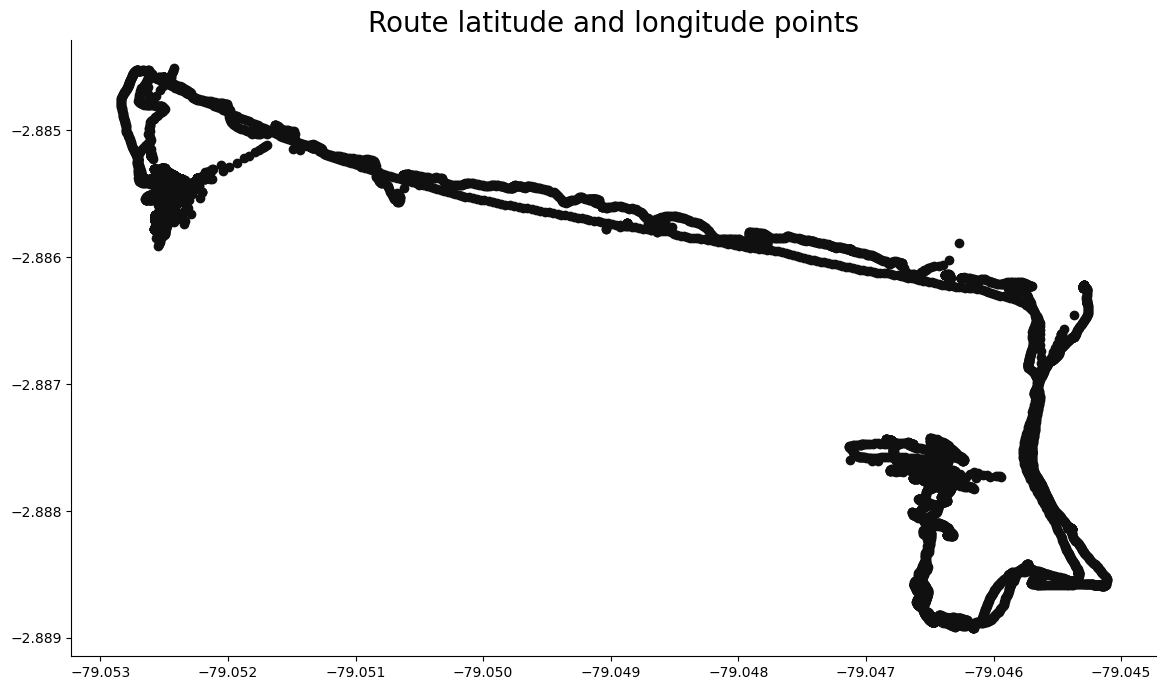

In [13]:
plt.figure(figsize=(14, 8))
plt.scatter(route_df['lon'], route_df['lat'], color='#101010')
plt.title('Route latitude and longitude points', size=20);

In [14]:
tdf = skmob.TrajDataFrame(route_df, latitude='lat', longitude='lon', datetime='time', user_id='user')
print(tdf.head())

        lat        lng elevation                  datetime trajectory_id
0 -2.885413 -79.052413      None 2023-04-07 06:54:11+00:00             1
1 -2.885413 -79.052413      None 2023-04-07 06:54:12+00:00             1
2 -2.885412 -79.052413      None 2023-04-07 06:54:13+00:00             1
3 -2.885413 -79.052415      None 2023-04-07 06:54:14+00:00             1
4 -2.885412 -79.052415      None 2023-04-07 06:54:15+00:00             1


In [15]:
tdf.plot_trajectory(zoom=12, weight=3, opacity=0.9, tiles='Stamen Toner')

/home/jag/anaconda3/envs/llacta-rumbos/lib/python3.10/site-packages/skmob/core/trajectorydataframe.py:569: UserWarning: Only the trajectories of the first 10 users will be plotted. Use the argument `max_users` to specify the desired number of users, or filter the TrajDataFrame.
  return plot.plot_trajectory(self, map_f=map_f, max_users=max_users, max_points=max_points, style_function=style_function,
/home/jag/anaconda3/envs/llacta-rumbos/lib/python3.10/site-packages/skmob/core/trajectorydataframe.py:569: UserWarning: If necessary, trajectories will be down-sampled to have at most `max_points` points. To avoid this, specify `max_points=None`.
  return plot.plot_trajectory(self, map_f=map_f, max_users=max_users, max_points=max_points, style_function=style_function,


In [16]:
stdf = detection.stay_locations(tdf, minutes_for_a_stop=0.05, spatial_radius_km=0.001, leaving_time=True)
print(stdf.head())

        lat        lng elevation                  datetime trajectory_id   
0 -2.885412 -79.052415      None 2023-04-07 06:54:11+00:00             1  \
1 -2.885400 -79.052422      None 2023-04-07 06:54:19+00:00             1   
2 -2.885378 -79.052455      None 2023-04-07 06:54:55+00:00             1   
3 -2.885377 -79.052460      None 2023-04-07 06:55:10+00:00             1   
4 -2.885387 -79.052468      None 2023-04-07 06:55:33+00:00             1   

           leaving_datetime  
0 2023-04-07 06:54:19+00:00  
1 2023-04-07 06:54:55+00:00  
2 2023-04-07 06:55:10+00:00  
3 2023-04-07 06:55:33+00:00  
4 2023-04-07 06:55:44+00:00  


In [17]:
print('Points of the original trajectory:\t%s'%len(tdf))

Points of the original trajectory:	17876


In [18]:
print('Points of stops:\t\t\t%s'%len(stdf))

Points of stops:			854


In [19]:
m = stdf.plot_trajectory(max_users=1, start_end_markers=False)
stdf.plot_stops(max_users=1, map_f=m)

/home/jag/anaconda3/envs/llacta-rumbos/lib/python3.10/site-packages/skmob/core/trajectorydataframe.py:569: UserWarning: If necessary, trajectories will be down-sampled to have at most `max_points` points. To avoid this, specify `max_points=None`.
  return plot.plot_trajectory(self, map_f=map_f, max_users=max_users, max_points=max_points, style_function=style_function,
